# Time Taken vs Thesis Grade Analysis 

### Importing libraries/loading data/custom functions

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import copy

In [2]:
# Reading in the data

os.chdir('C:\\Users\\yeachan153\\Desktop\\Methodology-Consulting\\Project')
data = pd.read_csv('Master Dataframe.csv')
print(list(data)[0:12]) # Columns

['StudentID', 'Programme code', 'Study plan', 'Description', 'EC taken', 'Start Date', 'Graduation date', 'MSc duration', 'Specialisation', 'thesis_grades', 'Code ondersch.', 'Formele omschr.']


### Seperating MSc/RMes Data, and filtering datapoints with insufficient time

In [10]:
MSc = data[data['Description']=='M Psychologie']
RMes = data[data['Description']=='M Psychology (res)']

print(set(RMes['MSc duration'].isnull()))
print(set(RMes['thesis_grades'].isnull()))
print(set(MSc['MSc duration'].isnull()))
print(set(MSc['thesis_grades'].isnull()))

print(str(MSc.shape[0] - MSc[MSc['MSc duration'] >= 200].shape[0]) + ' MSc students removed who finished within 200 days')
MSc_filtered = MSc[MSc['MSc duration'] >= 200]

print(str(RMes.shape[0] - RMes[RMes['MSc duration'] >= 500].shape[0]) + ' RMes students removed who finished within 500 days')
RMes_filtered = RMes[RMes['MSc duration'] >= 500]

{False}
{False}
{False}
{False}
26 MSc students removed who finished within 200 days
21 RMes students removed who finished within 500 days


### Assessing the correlation between Research Master (RMes) student thesis grades and Time taken

In [13]:
print(stats.kstest(RMes_filtered['thesis_grades'],'norm'))
print(stats.kstest(RMes_filtered['MSc duration'],'norm'))

print(len(RMes_filtered))
stats.spearmanr(RMes_filtered['thesis_grades'], RMes_filtered['MSc duration']) # rs = -0.163, p = 0.0250, n = 189

KstestResult(statistic=0.9999999990134123, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
189


SpearmanrResult(correlation=-0.16306304113093253, pvalue=0.024967757662592523)

We used spearman's as most likely there isn't bivariate normality. Spearman's indicates a very weak negative correlation - i.e. as duration increases, thesis grade decreases

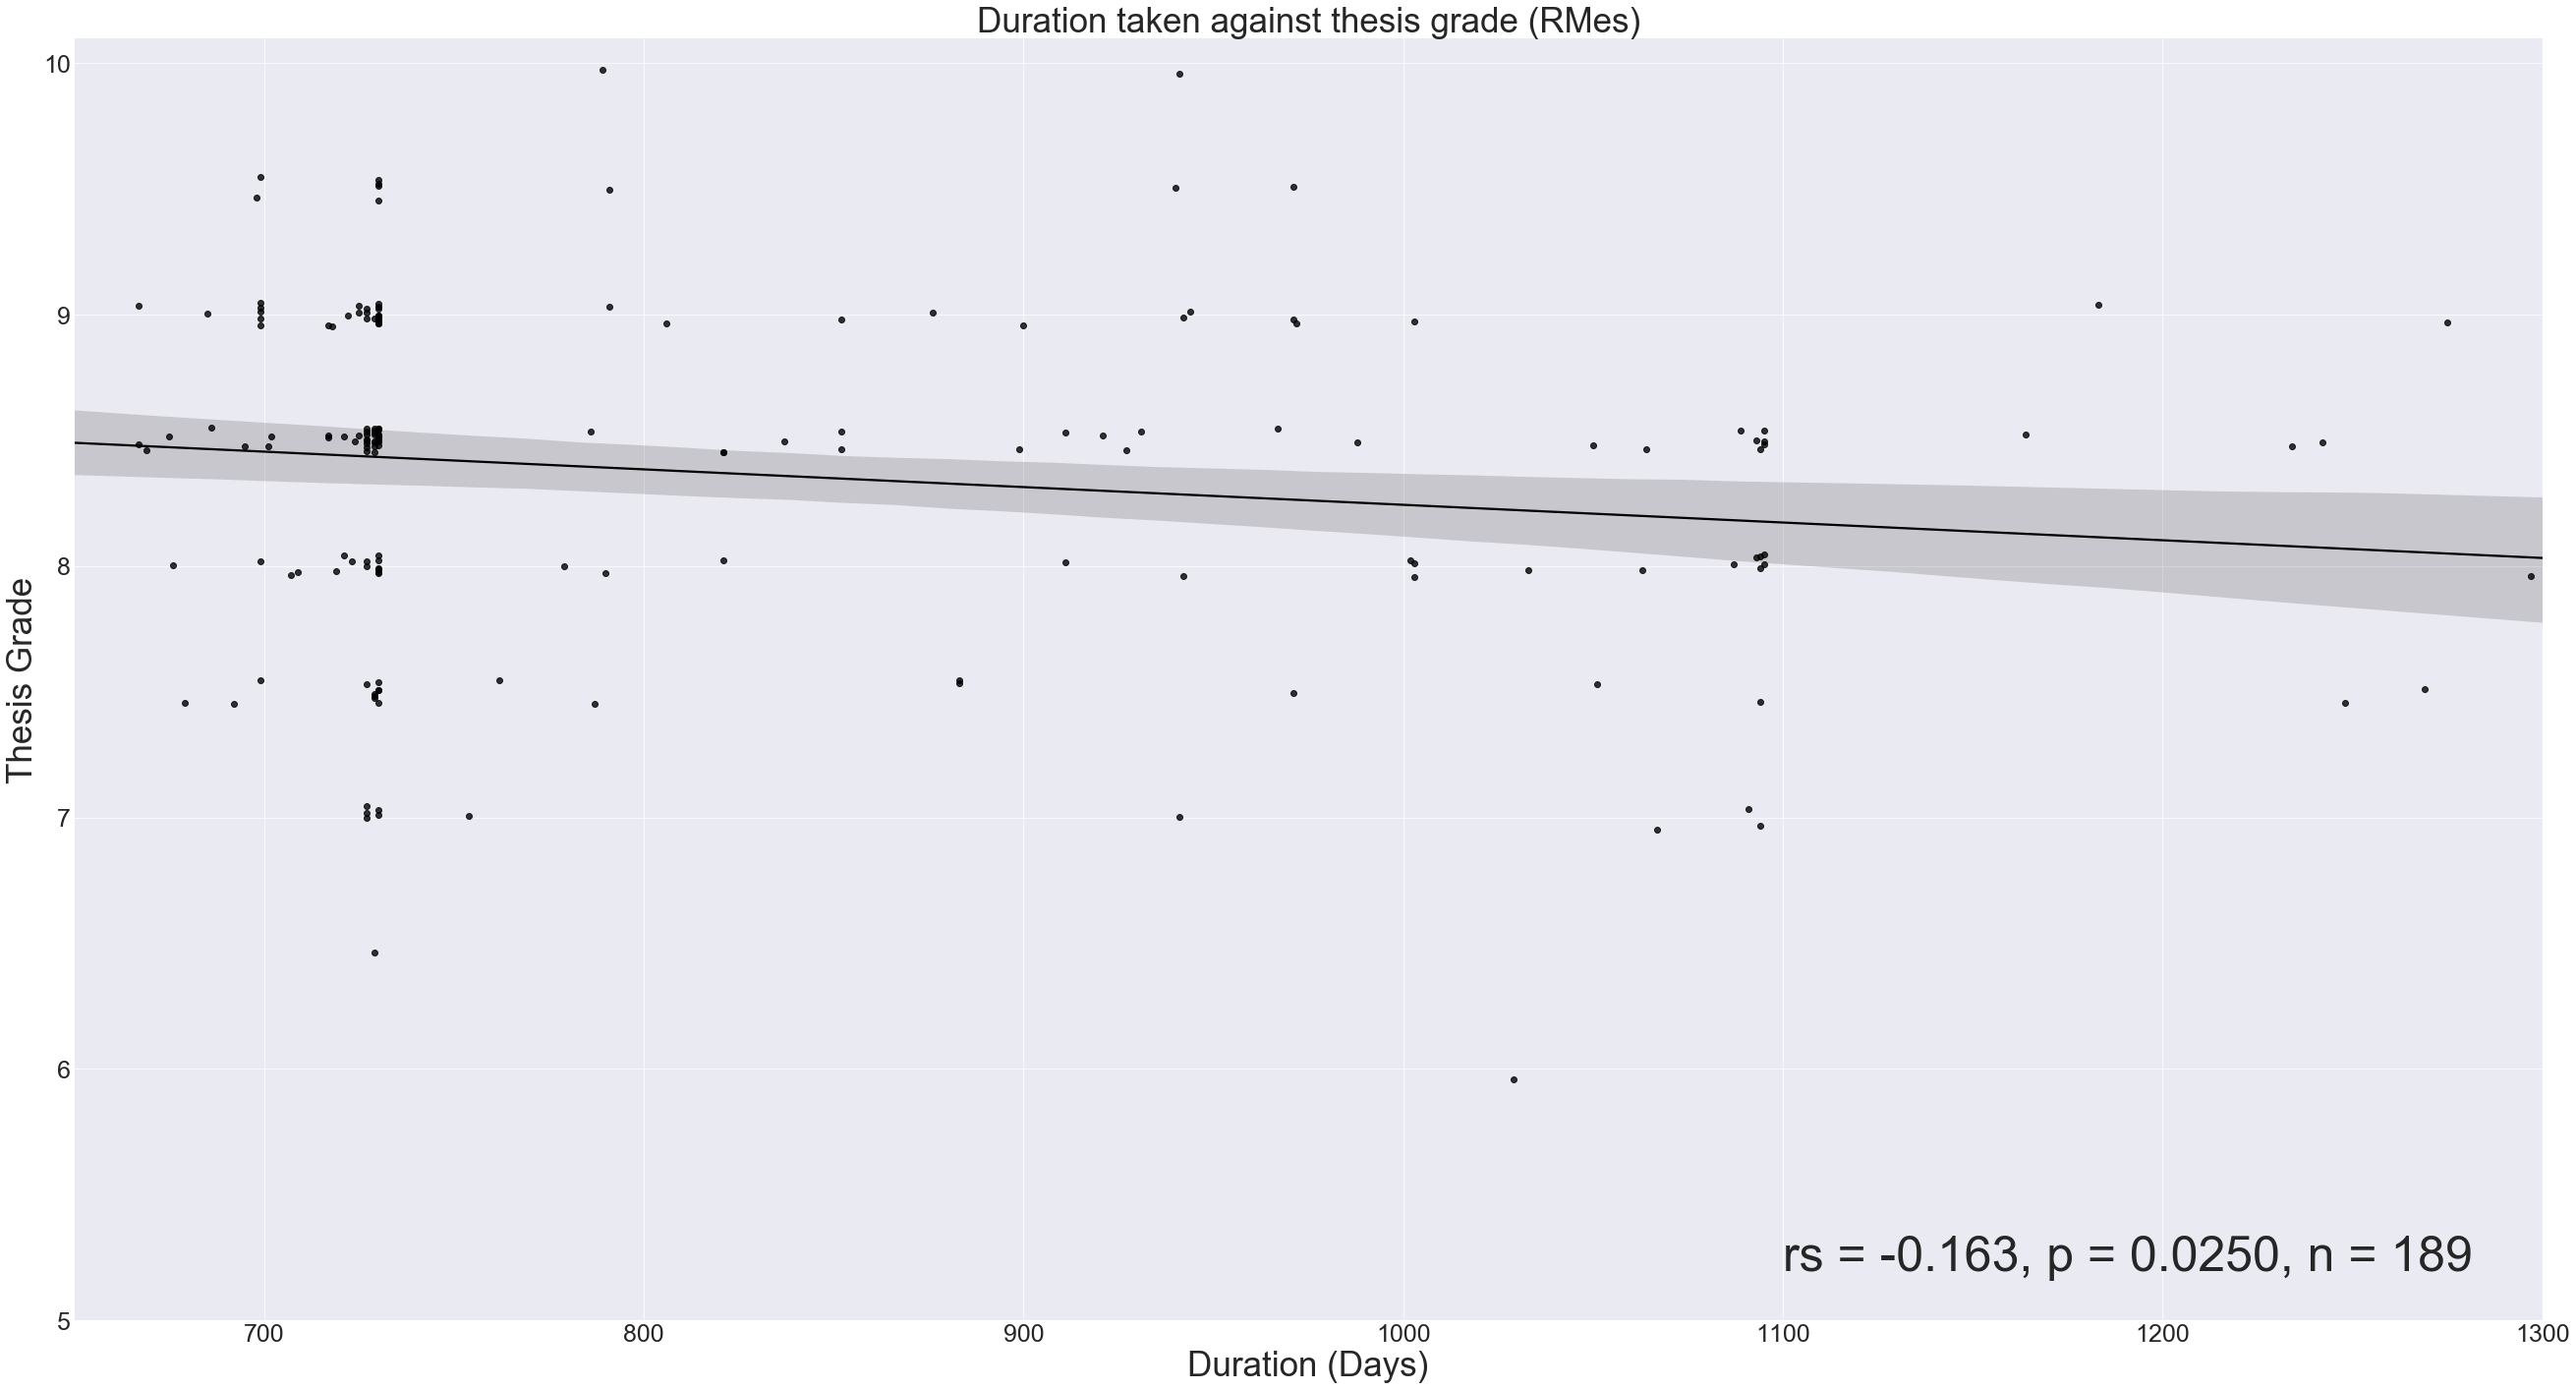

In [37]:
fig, ax = plt.subplots(figsize = (45,24))
sns.regplot(RMes_filtered['MSc duration'], RMes_filtered['thesis_grades'], color = 'black', y_jitter = 0.05)
plt.xlabel('Duration (Days)', fontsize = 35)
plt.ylabel('Thesis Grade', fontsize = 35)
plt.title('Duration taken against thesis grade (RMes)', fontsize = 35)
sns.set_style('darkgrid')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
ax.set_ylim(5,10.1)
ax.set_xlim(650, 1300)
ax.text(1100, 5.2, 'rs = -0.163, p = 0.0250, n = 189', fontsize = 50)
plt.show()

### Assessing the correlation between 1 Year Master (MSc) student thesis grades and ECs taken

In [43]:
print(stats.kstest(MSc_filtered['thesis_grades'],'norm'))
print(stats.kstest(MSc_filtered['MSc duration'],'norm'))

stats.spearmanr(MSc_filtered['thesis_grades'], MSc_filtered['MSc duration']) # rs = -0.178, p < 0.001, n = 865

KstestResult(statistic=0.9999997133484281, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


SpearmanrResult(correlation=-0.17774961087036995, pvalue=1.423639158355527e-07)

Just like the RMes students, there is a small negative correlation between 1 Year MSc student thesis grades and time taken to complete the Master program. 

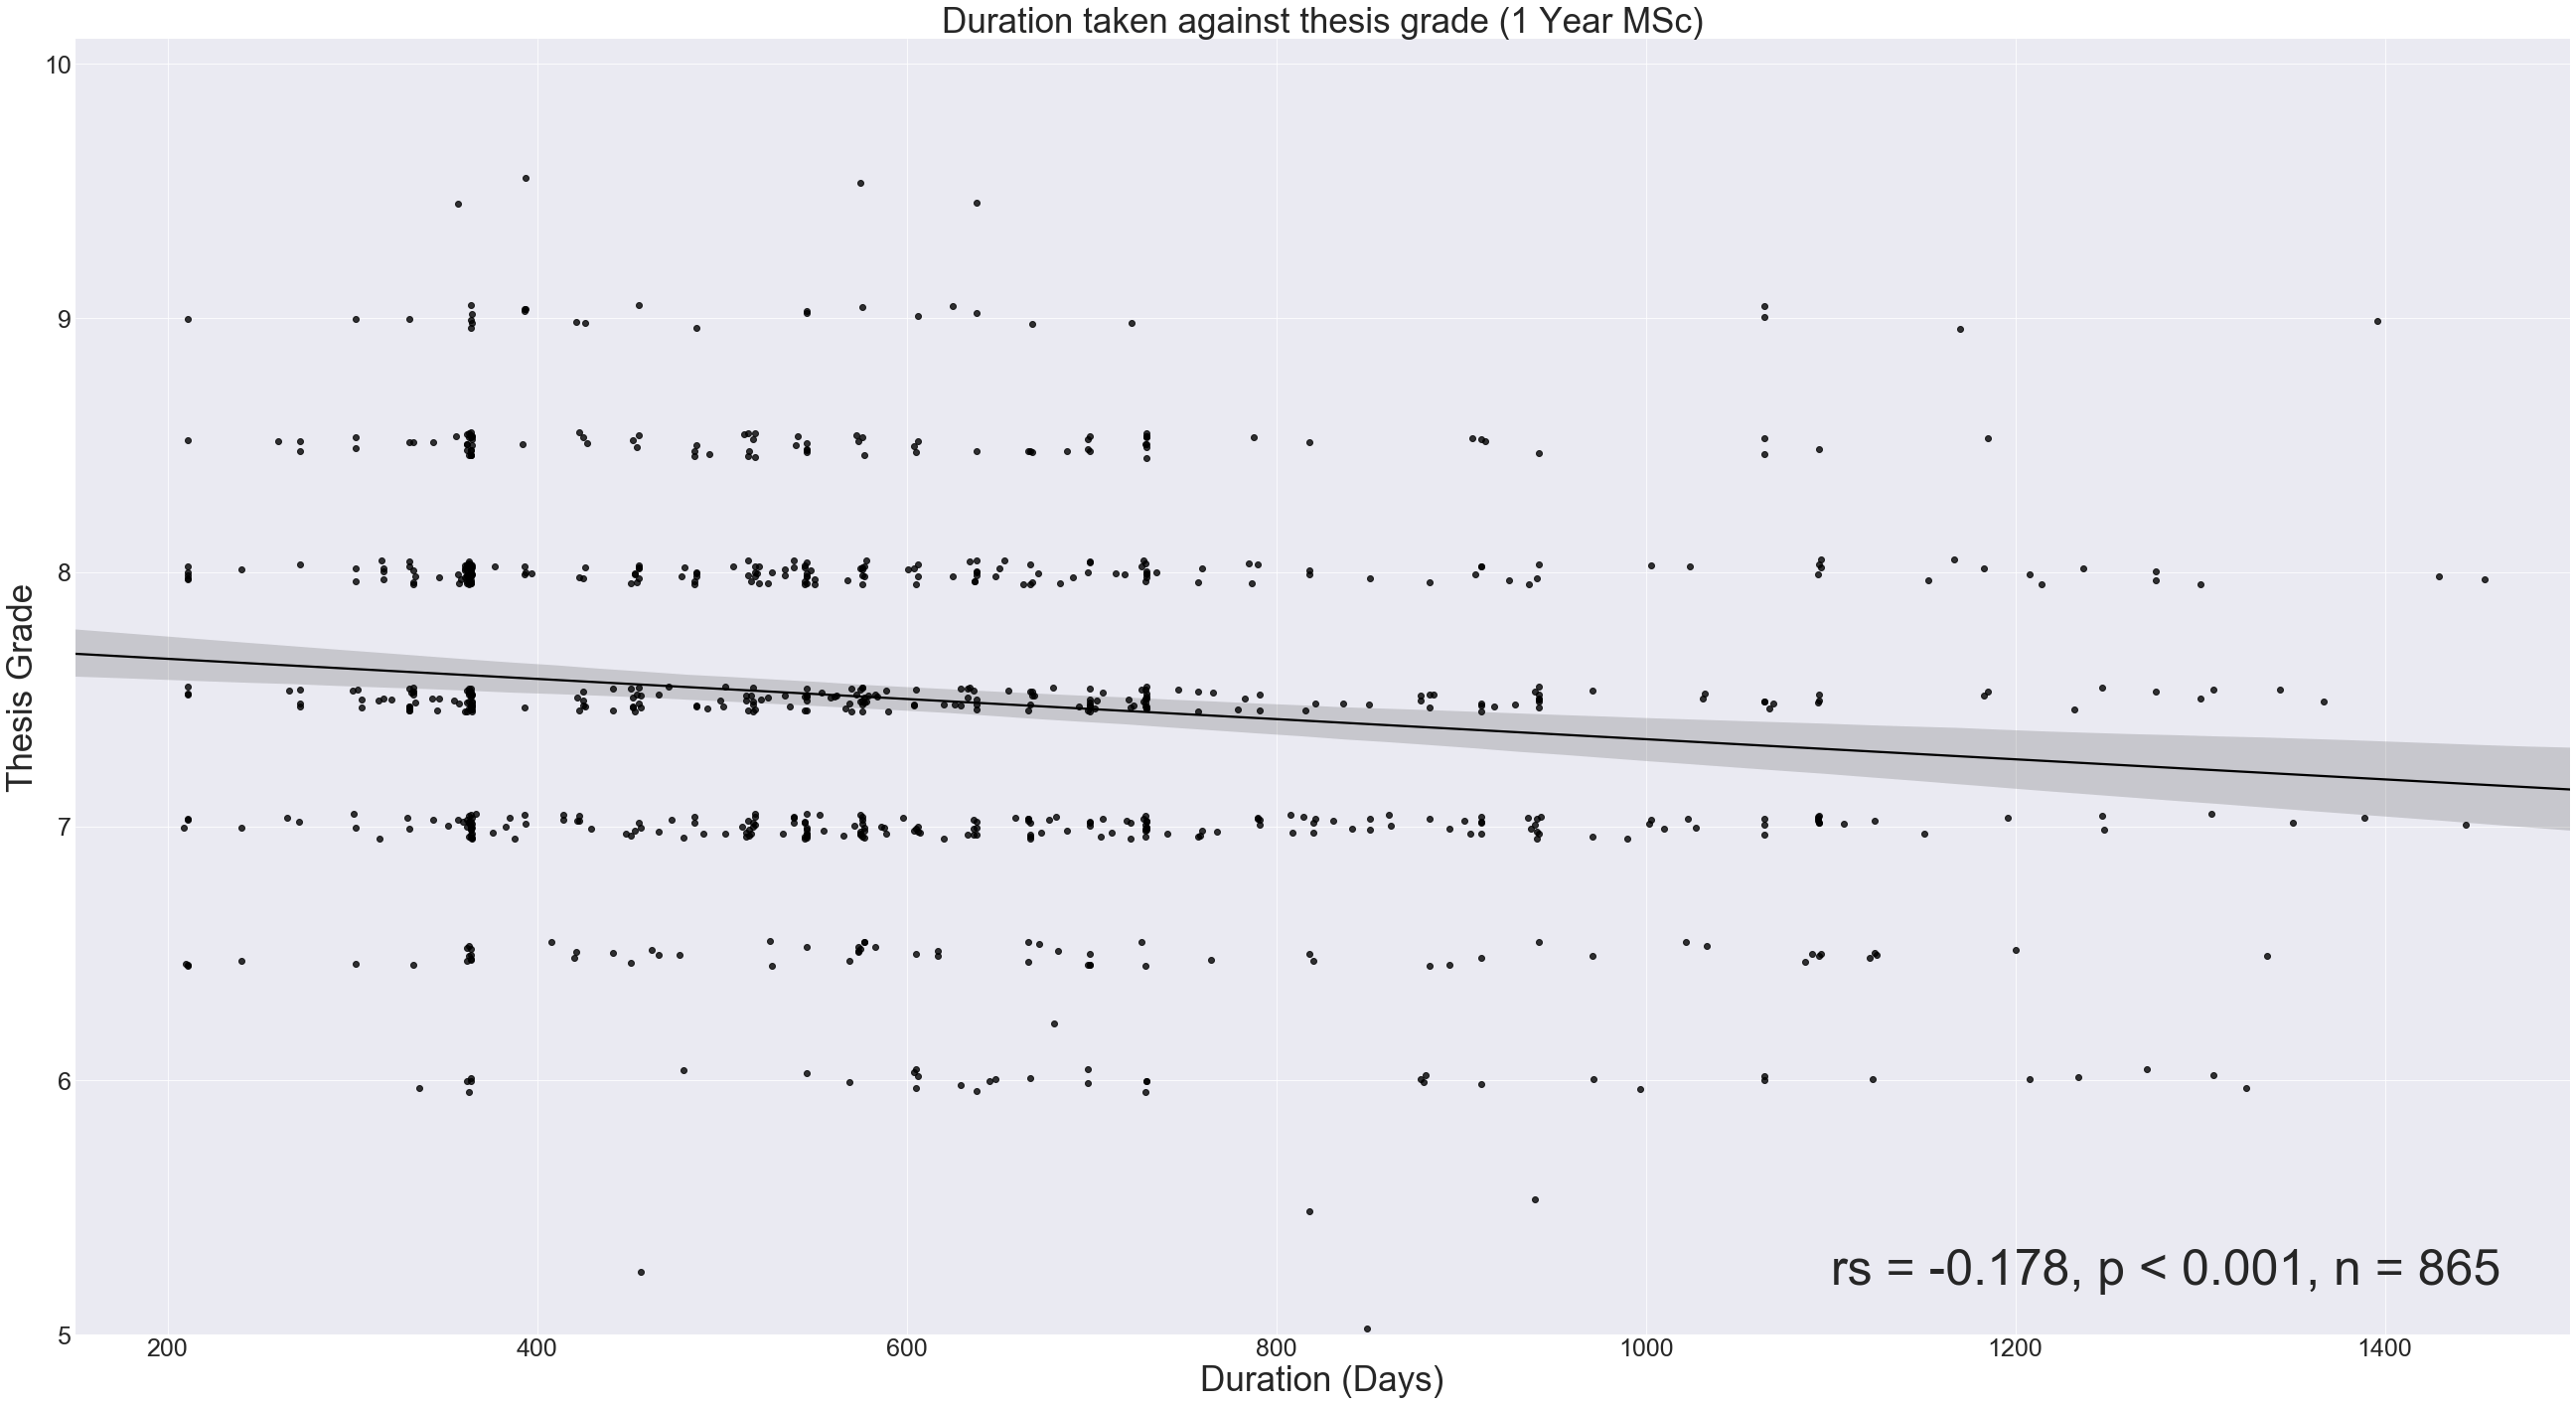

In [58]:
fig, ax = plt.subplots(figsize = (45,24))
sns.regplot(MSc_filtered['MSc duration'], MSc_filtered['thesis_grades'], color = 'black', y_jitter = 0.05)
plt.xlabel('Duration (Days)', fontsize = 35)
plt.ylabel('Thesis Grade', fontsize = 35)
plt.title('Duration taken against thesis grade (1 Year MSc)', fontsize = 35)
sns.set_style('darkgrid')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
ax.set_ylim(5,10.1)
ax.set_xlim(150, 1500)
ax.text(1100, 5.2, 'rs = -0.178, p < 0.001, n = 865', fontsize = 50)
plt.show()

### Assessing the correlation between 1 Year Master Track thesis grades and study duration

In [59]:
MSc_filtered['Specialisation'].value_counts().sort_values(ascending = False)

Spec Work & Organ. Psychology     213
Spec Social Psychology            189
Track Sport & Performance Psy      86
General Psychology                 74
Track Training & Development       67
Track Behaviour & Health           66
Spec Brain & Cognition             40
Track Clinical Forensic Psych      25
Spec Clinical Psychology           19
Inactief T&D                       16
Spec Clinical Developmental Ps     12
Spec Psychological Methods         11
Spec Developmental Psychology       6
Psycho. Gedragsbeïnvloeding         6
Spec Clinical Neuropsychology       4
Name: Specialisation, dtype: int64

In [60]:
print(str(MSc_filtered['Specialisation'].value_counts().sum()) + ' out of ' + str(len(MSc_filtered)) +
      ' students have specialisations')

834 out of 865 students have specialisations


In [63]:
# Selecting specialisations with more than 20 people

MSc_filtercopy = copy.deepcopy(MSc_filtered)
groups = MSc_filtercopy.groupby('Specialisation')
MSc_filtercopy = groups.filter(lambda x: len(x) > 20) 

print('After selecting specialisations with more than 20 students, we are left with ' + str(len(MSc_filtercopy)) + ' students')
print('We will look at: ' + ", ".join(list(set(MSc_filtercopy['Specialisation']))))

spec_groups = MSc_filtercopy.groupby('Specialisation')
list_df = [spec_groups.get_group(x) for x in spec_groups.groups]

After selecting specialisations with more than 20 students, we are left with 760 students
We will look at: Spec Work & Organ. Psychology, General Psychology, Spec Brain & Cognition, Spec Social Psychology, Track Behaviour & Health, Track Sport & Performance Psy, Track Clinical Forensic Psych, Track Training & Development


### Checking for normality between all 8 specialisations

In [64]:
norm_dict = {}

for i in range(len(list_df)):
    current_df = list_df[i]
    current_spec = "".join(list(set(current_df['Specialisation'])))
    norm_dict[current_spec] = [stats.kstest(current_df['thesis_grades'],'norm')]
    norm_dict[current_spec].append(stats.kstest(current_df['MSc duration'],'norm'))

print(norm_dict)

{'General Psychology': [KstestResult(statistic=0.9999999810104375, pvalue=0.0), KstestResult(statistic=1.0, pvalue=0.0)], 'Spec Brain & Cognition': [KstestResult(statistic=0.9999999990134123, pvalue=0.0), KstestResult(statistic=1.0, pvalue=0.0)], 'Spec Social Psychology': [KstestResult(statistic=0.9999999239503948, pvalue=0.0), KstestResult(statistic=1.0, pvalue=0.0)], 'Spec Work & Organ. Psychology': [KstestResult(statistic=0.9999997133484281, pvalue=0.0), KstestResult(statistic=1.0, pvalue=0.0)], 'Track Behaviour & Health': [KstestResult(statistic=0.9999999990134123, pvalue=0.0), KstestResult(statistic=1.0, pvalue=0.0)], 'Track Clinical Forensic Psych': [KstestResult(statistic=0.9999999990134123, pvalue=0.0), KstestResult(statistic=1.0, pvalue=0.0)], 'Track Sport & Performance Psy': [KstestResult(statistic=0.9999999990134123, pvalue=0.0), KstestResult(statistic=1.0, pvalue=0.0)], 'Track Training & Development': [KstestResult(statistic=0.9999999990134123, pvalue=0.0), KstestResult(sta

We can see that in most likelihood, we fail the bivariate normality assumption to run a Pearson's correlation. Therefore we run a spearman's rank-order test.

### Checking for significant correlations

In [66]:
cor_dict = {}

for i in range(len(list_df)):
    current_df = list_df[i]
    current_spec = "".join(list(set(current_df['Specialisation'])))
    cor_dict[current_spec] = stats.spearmanr(current_df['thesis_grades'], current_df['MSc duration'])

cor_dict

{'General Psychology': SpearmanrResult(correlation=-0.18044086790608518, pvalue=0.12394036200031992),
 'Spec Brain & Cognition': SpearmanrResult(correlation=-0.2111440251397347, pvalue=0.19092461117651974),
 'Spec Social Psychology': SpearmanrResult(correlation=-0.25515639365859827, pvalue=0.00039502752225422874),
 'Spec Work & Organ. Psychology': SpearmanrResult(correlation=-0.18709232770258494, pvalue=0.006168642324733958),
 'Track Behaviour & Health': SpearmanrResult(correlation=-0.37340162676829286, pvalue=0.0020144475138765827),
 'Track Clinical Forensic Psych': SpearmanrResult(correlation=0.13545125769514732, pvalue=0.5185584954339452),
 'Track Sport & Performance Psy': SpearmanrResult(correlation=-0.045980610891845165, pvalue=0.6742009464427119),
 'Track Training & Development': SpearmanrResult(correlation=0.12516785255080753, pvalue=0.3128604682957077)}

We want to specifically investigate the negative correlations found in: 'Spec Social Psychology', 'Spec Work & Organ. Psychology' & 'Track Behaviour & Health'

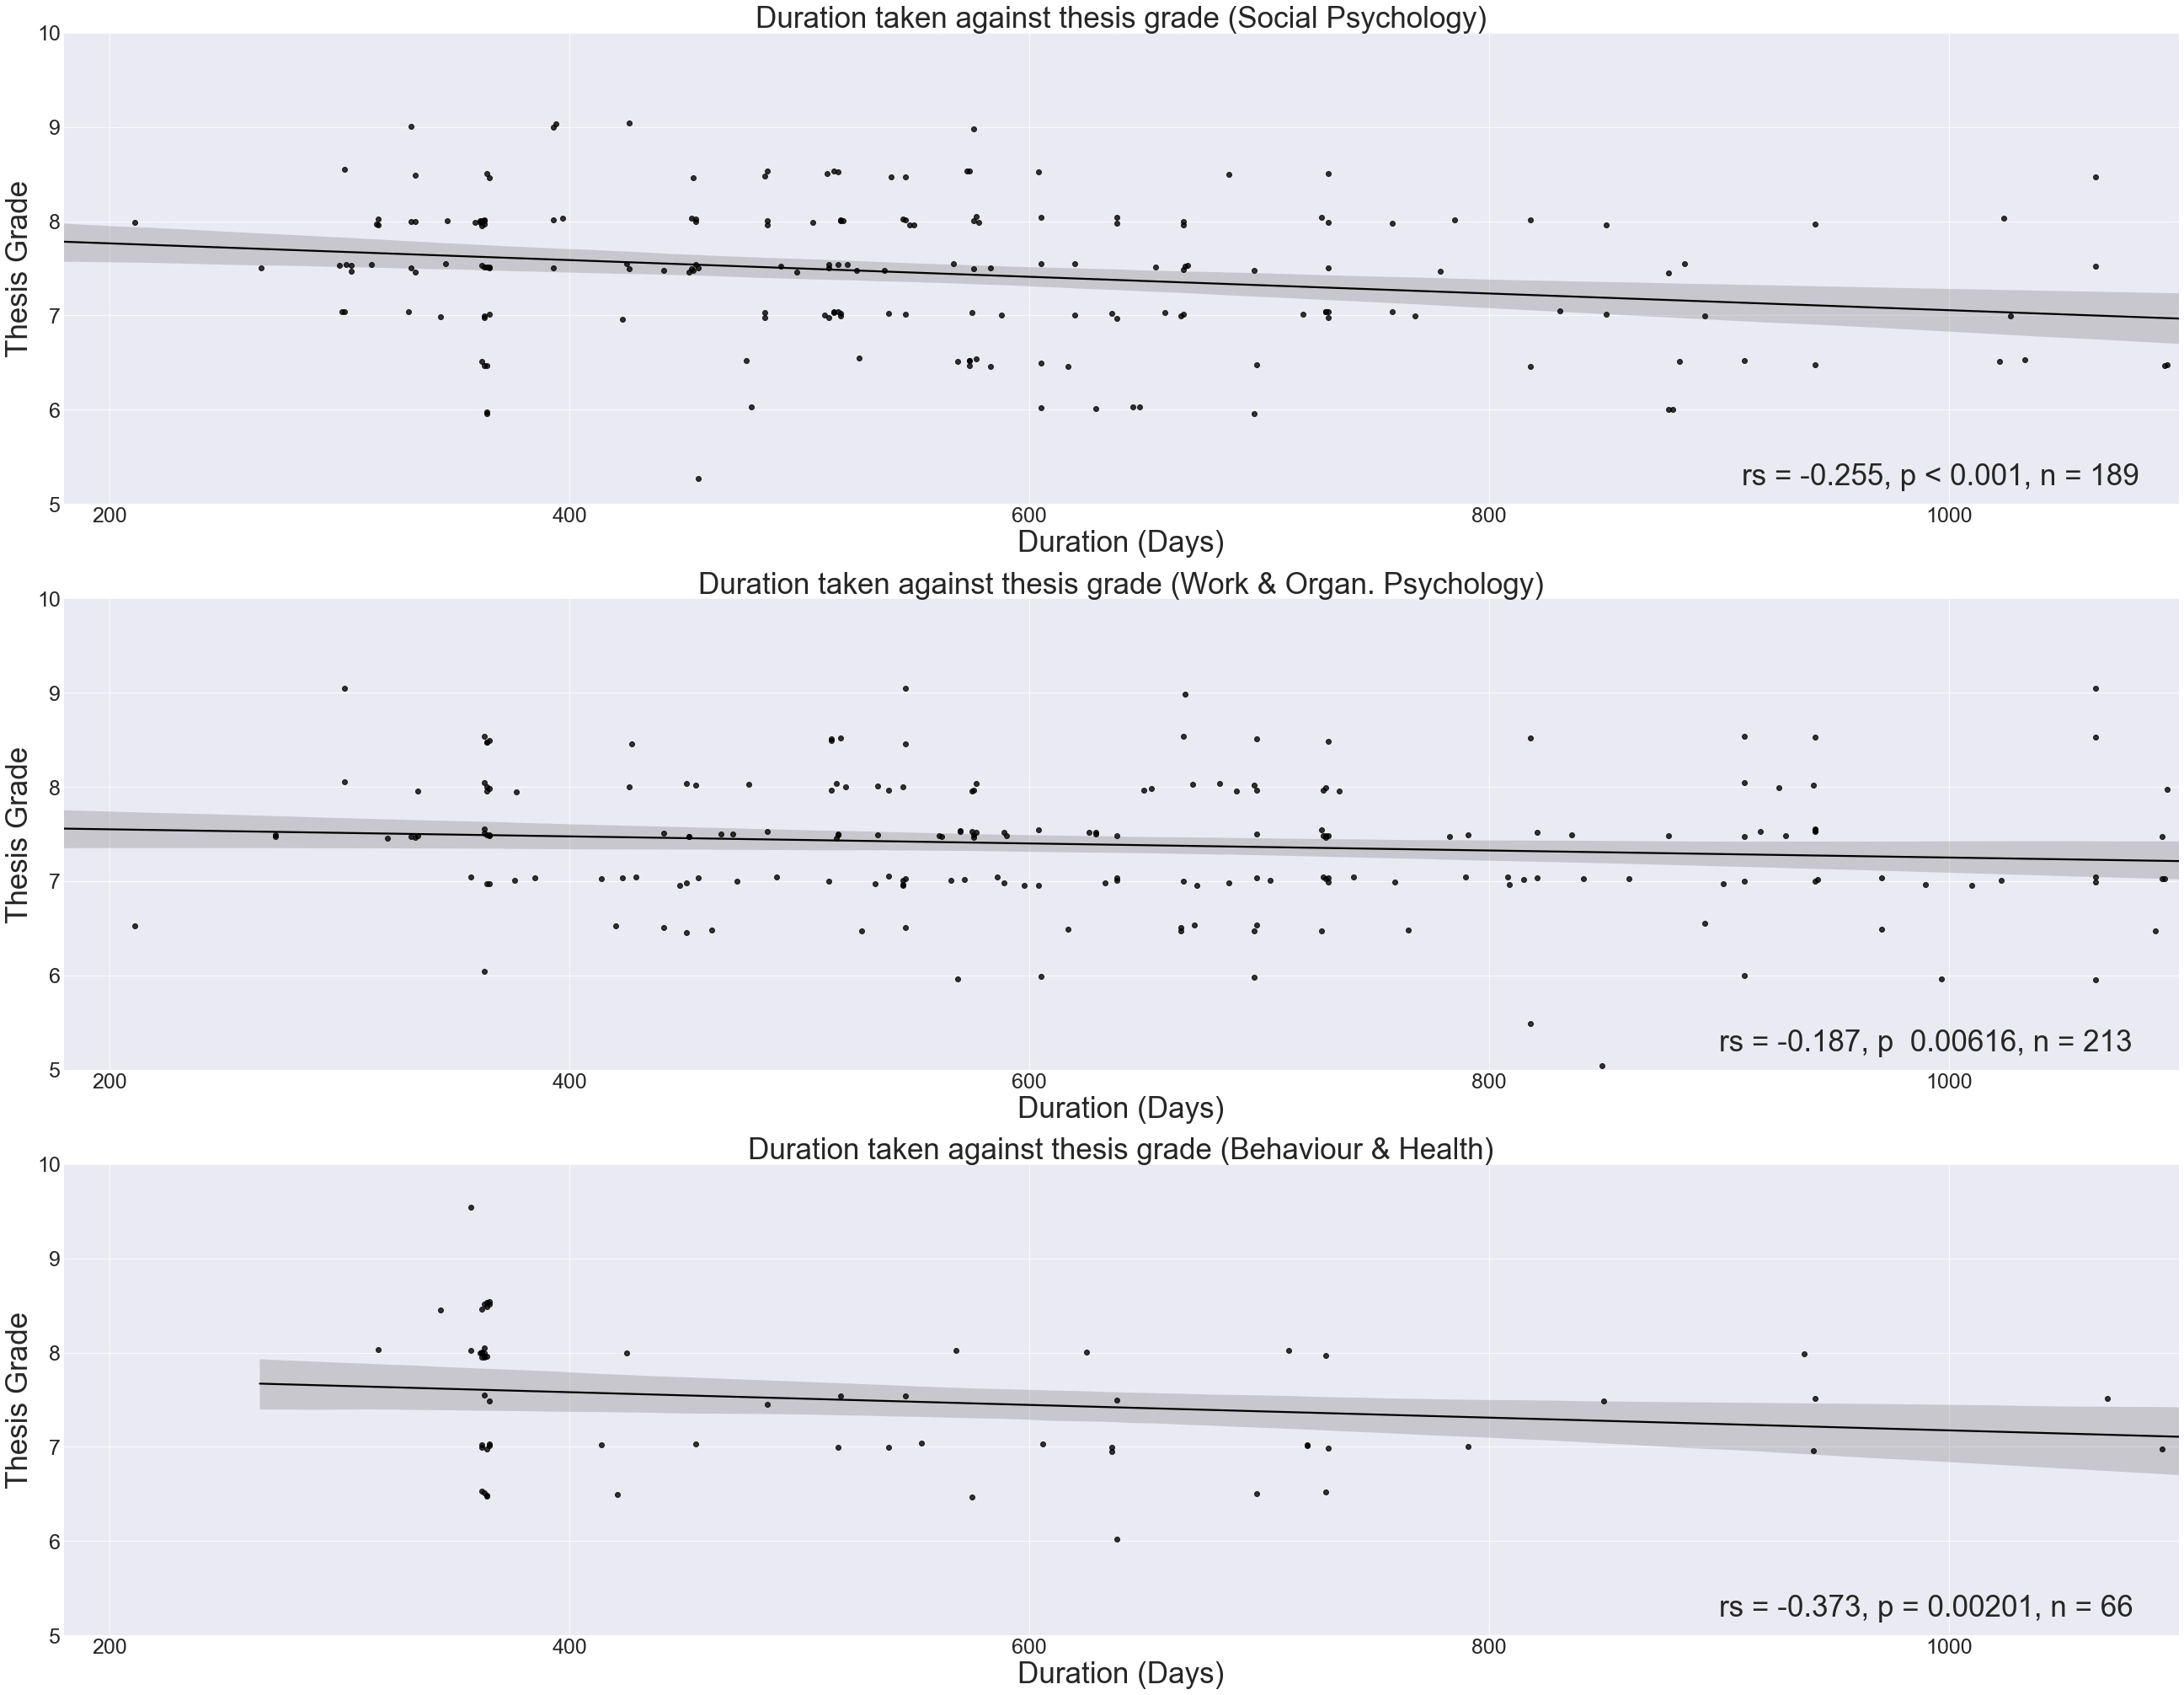

In [145]:
# Vertical plots

list_select = [list_df[2], list_df[3], list_df[4]] # Social psych, Work & Org, Behaviour & Health
title = ['Duration taken against thesis grade (Social Psychology)','Duration taken against thesis grade (Work & Organ. Psychology)',
        'Duration taken against thesis grade (Behaviour & Health)']
text = ['rs = -0.255, p < 0.001, n = 189', 'rs = -0.187, p  0.00616, n = 213', 'rs = -0.373, p = 0.00201, n = 66']

fig = plt.figure(figsize = (45,35))
for i in range(3):
    ax = fig.add_subplot(3,1,i+1)
    sns.regplot(list_select[i]['MSc duration'], list_select[i]['thesis_grades'], color = 'black', y_jitter = 0.05)
    sns.set_style('darkgrid')
    ax.set_title(title[i], fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.xlabel('Duration (Days)', fontsize = 35)
    plt.ylabel('Thesis Grade', fontsize = 35)
    ax.set_ylim(5,10)
    ax.set_xlim(180,1100)
    if i == 0:
        ax.text(910, 5.2, text[i], fontsize = 35)
    if i == 1:
        ax.text(900, 5.2, text[i], fontsize = 35)
    if i == 2:
        ax.text(900, 5.2, text[i], fontsize = 35)